# Introduction
    

## 1) Feature selection
   

###### - Pandas training dataset, test dataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
import matplotlib as matplot
import numpy as np

import re
import sklearn

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

df_train = pd.read_csv('Train_data.csv')
df_test = pd.read_csv('test_data.csv')
df_test = df_test.drop('Unnamed: 0', axis=1)

In [81]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,0,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,0,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,0,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,0,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [4]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,25,4,0,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.65,0.65,0.32,0.32,dos
1,0,icmp,25,2,312,1856,0,0,0,0,...,254,1.00,0.00,1.00,0.06,0.00,0.00,0.00,0.00,normal
2,0,icmp,25,2,245,2058,0,0,0,0,...,255,1.00,0.00,0.01,0.05,0.01,0.00,0.00,0.00,normal
3,0,icmp,25,2,298,1267,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,icmp,20,2,740,0,0,0,0,0,...,19,0.18,0.03,0.18,0.00,0.00,0.00,0.00,0.00,normal


###### - training dataset test dateaset

In [5]:
X_train = df_train.drop('xAttack', axis=1)
Y_train = df_train.loc[:,['xAttack']]
X_test = df_test.drop('xAttack', axis=1)
Y_test = df_test.loc[:,['xAttack']]

###### - preprocessing  one hot encoding, Xonehotencoder, YLabelBinarizer

In [6]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [7]:
le = preprocessing.LabelEncoder()
enc = OneHotEncoder()
lb = preprocessing.LabelBinarizer()

- X OneHotEncoding

In [8]:
X_train['protocol_type'] = le.fit_transform(X_train['protocol_type'])
# enc.fit_transform(X_train['protocol_type'])

X_test['protocol_type'] = le.fit_transform(X_test['protocol_type'])
# enc.fit_transform(X_test['protocol_type'])

X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,20,2,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,45,2,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,50,4,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,0,25,2,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,0,25,2,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


- Y LabelBinarizer

In [9]:
Y_train['xAttack'] = le.fit_transform(Y_train['xAttack'])
lb.fit_transform(Y_train['xAttack'])

Y_test['xAttack'] = le.fit_transform(Y_test['xAttack'])
lb.fit_transform(Y_test['xAttack'])

Y_train.describe()

,xAttack
count,125973.000000
mean,0.744985
std,0.653748
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,4.000000


### 1. Standard deviation
    

In [10]:
#except continuous feature
con_list = ['protocol_type', 'service', 'flag', 'land', 'logged_in', 'su_attempted', 'is_host_login', 'is_guest_login']
con_train = X_train.drop(con_list, axis=1)

#drop n smallest std features
stdtrain = con_train.std(axis=0)
std_X_train = stdtrain.to_frame()
std_X_train.nsmallest(10, columns=0).head(10)

,0
num_outbound_cmds,0.000000
urgent,0.014366
num_shells,0.022181
root_shell,0.036603
num_failed_logins,0.045239
num_access_files,0.099370
dst_host_srv_diff_host_rate,0.112564
diff_srv_rate,0.180314
dst_host_diff_srv_rate,0.188922
wrong_fragment,0.253530


#### num_outbound_cmds  standard deviation.

In [11]:
X_train = X_train.drop(['num_outbound_cmds'], axis=1)
X_test = X_test.drop(['num_outbound_cmds'], axis=1)

df_train = pd.concat([X_train, Y_train], axis=1)
df_train.head()

X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,20,2,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,45,2,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,50,4,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,0,25,2,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,0,25,2,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


####  feature drop -> X_train_stdrop. (Ensemble feature selection)

In [12]:
stdrop_list = ['urgent', 'num_shells', 'root_shell',
        'num_failed_logins', 'num_access_files', 'dst_host_srv_diff_host_rate',
        'diff_srv_rate', 'dst_host_diff_srv_rate', 'wrong_fragment']

X_test_stdrop = X_test.drop(stdrop_list, axis=1)

X_train_stdrop = X_train.drop(stdrop_list, axis=1)

df_train_stdrop = pd.concat([X_train_stdrop, Y_train], axis=1)

df_train_stdrop.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,0,20,2,491,0,0,0,0,0,...,0.00,150,25,0.17,0.17,0.00,0.00,0.05,0.00,1
1,0,2,45,2,146,0,0,0,0,0,...,0.00,255,1,0.00,0.88,0.00,0.00,0.00,0.00,1
2,0,0,50,4,0,0,0,0,0,0,...,0.00,255,26,0.10,0.00,1.00,1.00,0.00,0.00,0
3,0,0,25,2,232,8153,0,0,1,0,...,0.00,30,255,1.00,0.03,0.03,0.01,0.00,0.01,1
4,0,0,25,2,199,420,0,0,1,0,...,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,1


### 2. Ensemble feature selection
   

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [48]:
GB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, max_features='auto')
RF = RandomForestClassifier(n_estimators=10, criterion='entropy', max_features='auto', bootstrap=True)
DT = DecisionTreeClassifier(random_state=42)

In [49]:
y_train = Y_train['xAttack'].ravel()
x_train = X_train.values
x_test = X_test.values

### feature importances.

In [51]:
RF.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [52]:
RF_feature = RF.feature_importances_
RF_feature

rf_score = RF.score(X_test, Y_test)

print('RandomForestClassifier processing ,,,')
print('RandomForestClassifier Score: %.3f %%' % rf_score)

RandomForestClassifier processing ,,,
RandomForestClassifier Score: 0.767 %


In [53]:
GB.fit(X_train, Y_train)

GradientBoostingClassifier(max_features='auto', n_estimators=200)

In [54]:
GB_feature = GB.feature_importances_
GB_feature

gb_score = GB.score(X_test, Y_test)

print('GradientBoostingClassifier processing ,,,')
print('GradientBoostingClassifier Score: %.3f %%' % gb_score)

GradientBoostingClassifier processing ,,,
GradientBoostingClassifier Score: 0.767 %


In [55]:
DT.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [56]:
DT_feature = DT.feature_importances_
DT_feature

dt_score = DT.score(X_test, Y_test)

print('DecisionTreeClassifier processing ,,,')
print('DecisonTreeClassifier: %.3f %%' % dt_score)

DecisionTreeClassifier processing ,,,
DecisonTreeClassifier: 0.764 %


### Ensemble feature

In [61]:
cols = X_train.columns.values

feature_df = pd.DataFrame({'features': cols,
                           'DecisionTree' : DT_feature,
                           'RandomForest' : RF_feature,
                           'GradientBoost' : GB_feature
                          })
feature_df.head(8)

,features,DecisionTree,RandomForest,GradientBoost
0,duration,0.001217,0.003875,0.001521
1,protocol_type,0.000921,0.018776,0.011429
2,service,0.014988,0.036359,0.007802
3,flag,0.003327,0.017168,0.001157
4,src_bytes,0.540791,0.111110,0.361486
5,dst_bytes,0.011577,0.143488,0.062353
6,land,0.000440,0.000125,0.000036
7,wrong_fragment,0.003724,0.004597,0.013347


- Feature

[Text(0, 0, 'duration'),
 Text(1, 0, 'protocol_type'),
 Text(2, 0, 'service'),
 Text(3, 0, 'flag'),
 Text(4, 0, 'src_bytes'),
 Text(5, 0, 'dst_bytes'),
 Text(6, 0, 'land'),
 Text(7, 0, 'wrong_fragment'),
 Text(8, 0, 'urgent'),
 Text(9, 0, 'hot'),
 Text(10, 0, 'num_failed_logins'),
 Text(11, 0, 'logged_in'),
 Text(12, 0, 'num_compromised'),
 Text(13, 0, 'root_shell'),
 Text(14, 0, 'su_attempted'),
 Text(15, 0, 'num_root'),
 Text(16, 0, 'num_file_creations'),
 Text(17, 0, 'num_shells'),
 Text(18, 0, 'num_access_files'),
 Text(19, 0, 'is_host_login'),
 Text(20, 0, 'is_guest_login'),
 Text(21, 0, 'count'),
 Text(22, 0, 'srv_count'),
 Text(23, 0, 'serror_rate'),
 Text(24, 0, 'srv_serror_rate'),
 Text(25, 0, 'rerror_rate'),
 Text(26, 0, 'srv_rerror_rate'),
 Text(27, 0, 'same_srv_rate'),
 Text(28, 0, 'diff_srv_rate'),
 Text(29, 0, 'srv_diff_host_rate'),
 Text(30, 0, 'dst_host_count'),
 Text(31, 0, 'dst_host_srv_count'),
 Text(32, 0, 'dst_host_same_srv_rate'),
 Text(33, 0, 'dst_host_diff_srv_r

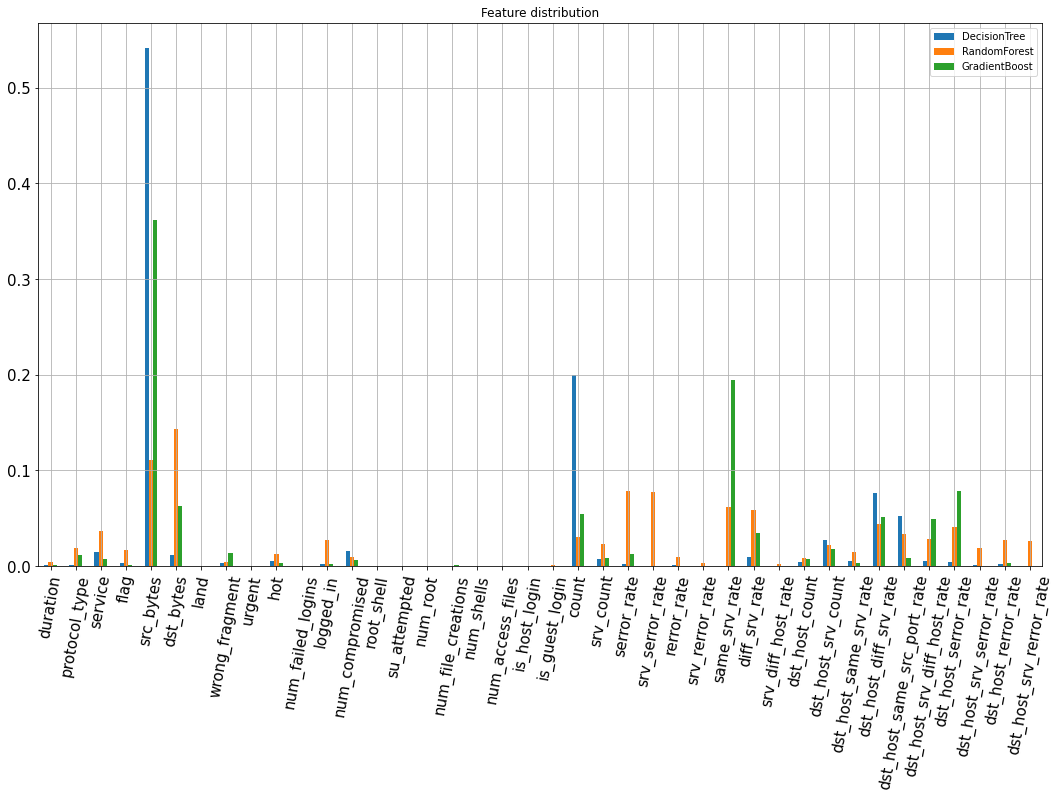

In [62]:
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

graph = feature_df.plot.bar(figsize = (18, 10), title = 'Feature distribution', grid=True, legend=True, fontsize = 15, 
                            xticks=feature_df.index)
graph.set_xticklabels(feature_df.features, rotation = 80)

#### Ensemble mode feature

In [63]:
d_f = feature_df.nlargest(12, 'DecisionTree')
g_f = feature_df.nlargest(12, 'GradientBoost')
r_f = feature_df.nlargest(12, 'RandomForest')

duplicate

In [64]:
result = pd.concat([d_f,g_f, r_f])
result = result.drop_duplicates() # duplicate feature삭제
result

,features,DecisionTree,RandomForest,GradientBoost
4,src_bytes,0.540791,0.111110,0.361486
21,count,0.200063,0.030499,0.054403
33,dst_host_diff_srv_rate,0.076432,0.043846,0.051016
34,dst_host_same_src_port_rate,0.052058,0.033972,0.008548
31,dst_host_srv_count,0.027198,0.022538,0.018000
12,num_compromised,0.015858,0.009350,0.006699
2,service,0.014988,0.036359,0.007802
5,dst_bytes,0.011577,0.143488,0.062353
28,diff_srv_rate,0.009275,0.058888,0.035088
22,srv_count,0.007913,0.022808,0.008270


In [74]:
selected_features = result['features'].values.tolist()
selected_features

['src_bytes',
 'count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_count',
 'num_compromised',
 'service',
 'dst_bytes',
 'diff_srv_rate',
 'srv_count',
 'hot',
 'dst_host_srv_diff_host_rate',
 'same_srv_rate',
 'dst_host_serror_rate',
 'wrong_fragment',
 'serror_rate',
 'protocol_type',
 'srv_serror_rate']

###  standard deviation feature training.

In [65]:
RF.fit(X_train_stdrop, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [68]:
rf2_score = RF.score(X_test_stdrop, Y_test)

print('RandeomForest_stdrop processing ,,,')
print('RandeomForest Score: %.3f %%' % rf2_score)

RandeomForest_stdrop processing ,,,
RandeomForest Score: 0.758 %


In [97]:
GB.fit(X_train_stdrop, Y_train)

GradientBoostingClassifier(max_features='auto', n_estimators=200)

In [98]:
gb2_score = GB.score(X_test_stdrop, Y_test)

print('GradientBoost_stdrop processing ,,,')
print('GradientBoost Score: %.3f %%' % knn2_score)

GradientBoost_stdrop processing ,,,
GradientBoost Score: 0.735 %


In [71]:
DT.fit(X_train_stdrop, Y_train)

DecisionTreeClassifier(random_state=42)

In [72]:
dt2_score = DT.score(X_test_stdrop, Y_test)

print('DecisionTreeClassifier_stdrop processing ,,,')
print('DecisonTreeClassifier Score: %.3f %%' % dt2_score)

DecisionTreeClassifier_stdrop processing ,,,
DecisonTreeClassifier Score: 0.769 %


- ensemble feature

In [75]:
X_train_ens = X_train[selected_features]
X_train_ens.head()

X_test_ens = X_test[selected_features]
X_test_ens.head()

,src_bytes,count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_count,num_compromised,service,dst_bytes,diff_srv_rate,srv_count,hot,dst_host_srv_diff_host_rate,same_srv_rate,dst_host_serror_rate,wrong_fragment,serror_rate,protocol_type,srv_serror_rate
0,0,110,0.00,0.00,255,0,25,0,0.0,110,0,0.00,1.0,0.65,0,1.0,0,1.0
1,312,1,0.00,1.00,254,0,25,1856,0.0,9,0,0.06,1.0,0.00,0,0.0,0,0.0
2,245,5,0.00,0.01,255,0,25,2058,0.0,5,0,0.05,1.0,0.01,0,0.0,0,0.0
3,298,4,0.00,0.00,255,0,25,1267,0.0,18,0,0.00,1.0,0.00,0,0.0,0,0.0
4,740,1,0.03,0.18,19,0,20,0,0.0,1,0,0.00,1.0,0.00,0,0.0,0,0.0


### 3. Correlation
    

<AxesSubplot:>

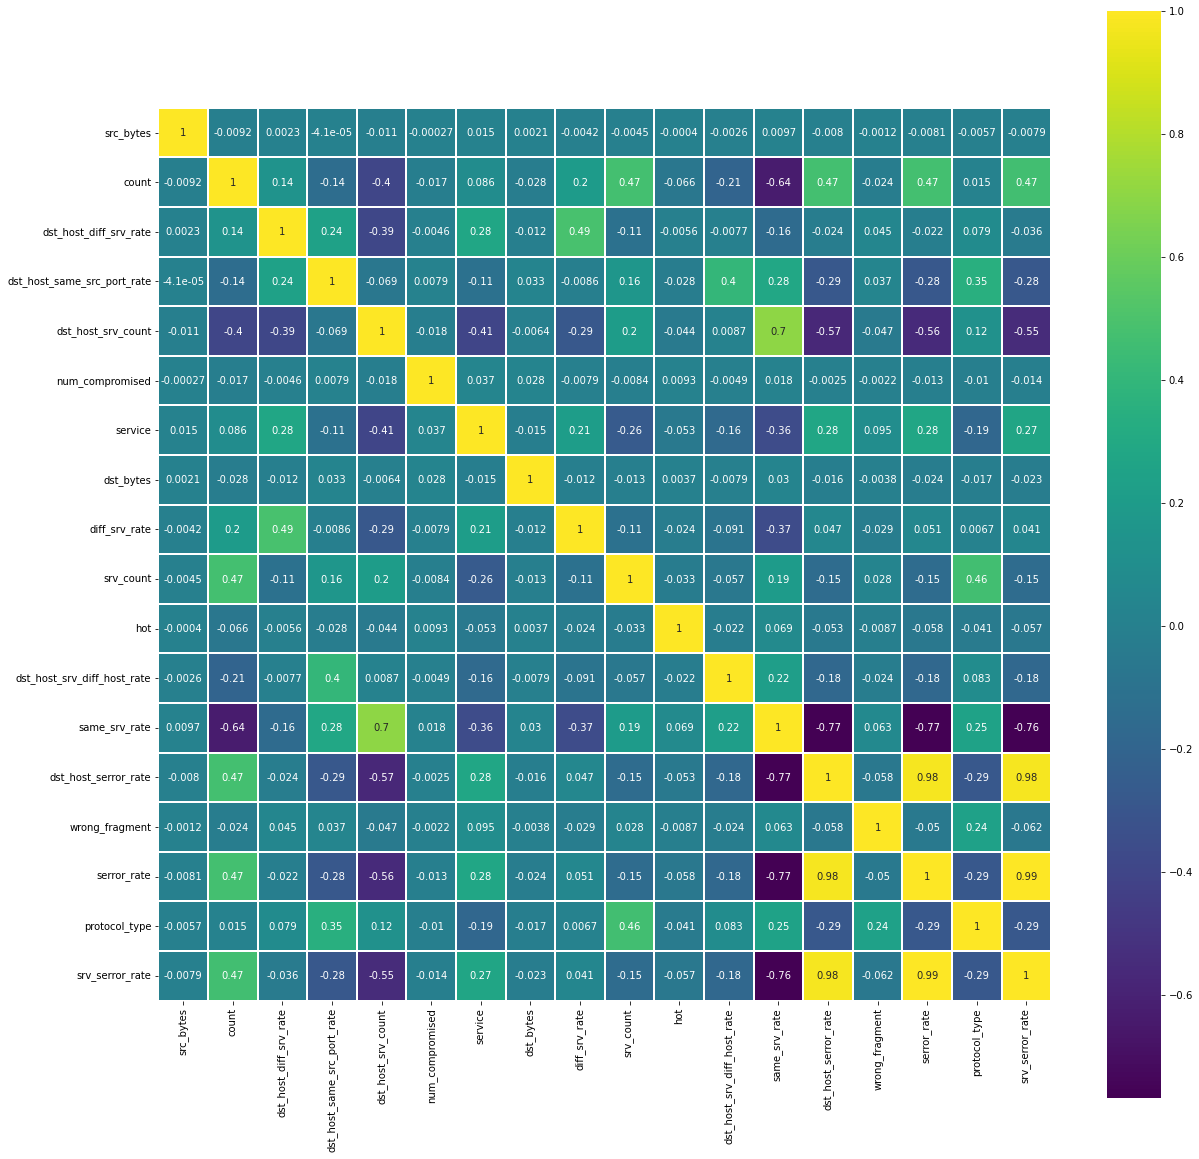

In [76]:
sample = X_train_ens[:10000]

colormap = plt.cm.viridis
plt.figure(figsize=(20, 20))
sns.heatmap(sample.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

In [85]:
selected2 = ['dst_host_serror_rate', 'serror_rate']
X_train_cordrop = X_train_ens.drop(selected2, axis=1)
X_train_cordrop.describe()

X_test_cordrop = X_test_ens.drop(selected2, axis=1)
X_test_cordrop.describe()

,src_bytes,count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_count,num_compromised,service,dst_bytes,diff_srv_rate,srv_count,hot,dst_host_srv_diff_host_rate,same_srv_rate,wrong_fragment,protocol_type,srv_serror_rate
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6.845032e+03,80.152400,0.089412,0.133167,139.645700,0.020500,35.451700,1.996999e+03,0.089752,31.730900,0.093200,0.020102,0.739925,0.009000,0.278600,0.101696
std,8.675409e+04,129.028094,0.218190,0.307154,111.548555,0.289289,15.824769,2.006975e+04,0.252240,90.353536,0.647731,0.089353,0.413711,0.146701,0.657134,0.295464
min,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,1.000000,0.000000,0.000000,15.000000,0.000000,25.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000
50%,5.400000e+01,8.000000,0.020000,0.000000,159.500000,0.000000,25.000000,4.400000e+01,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.850000e+02,126.000000,0.060000,0.030000,255.000000,0.000000,50.000000,5.990000e+02,0.060000,16.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000
max,6.291668e+06,511.000000,1.000000,1.000000,255.000000,15.000000,70.000000,1.285078e+06,1.000000,511.000000,30.000000,1.000000,1.000000,3.000000,2.000000,1.000000


## 2) Modeling

### Feature selection modeling (low deviation, high correlation )

### Ensemble modeling feature modeling

In [86]:
RF.fit(X_train_cordrop, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [87]:
rf_finalscore = RF.score(X_test_cordrop, Y_test)

print('RandomForestClassifier_final processing ,,,')
print('RandomForestClassifier_final Score: %.3f %%' % rf_finalscore)

RandomForestClassifier_final processing ,,,
RandomForestClassifier_final Score: 0.745 %


In [88]:
GB.fit(X_train_cordrop, Y_train)

GradientBoostingClassifier(max_features='auto', n_estimators=200)

In [90]:
gb_finalscore = GB.score(X_test_cordrop, Y_test)

print('GradientBoost_final processing ,,,')
print('GradientBoost_final Score: %.3f %%' % gb_finalscore)

GradientBoost_final processing ,,,
GradientBoost_final Score: 0.762 %


In [91]:
DT.fit(X_train_cordrop, Y_train)

DecisionTreeClassifier(random_state=42)

In [92]:
dt_finalscore = DT.score(X_test_cordrop, Y_test)

print('DeciosnTreeClassifier_final processing ,,,')
print('DecisionTreeClassifier_final Score: %.3f %%' % dt_finalscore)

DeciosnTreeClassifier_final processing ,,,
DecisionTreeClassifier_final Score: 0.778 %


## 3) Result

 feature selection, extraction

###  score

- first models

In [101]:
first_model = {'Model': ['GradientBoost', 'DecisonTree', 'RandomForest'],
               'accuracy' : [gb_score, dt_score, rf_score]}

result_df = pd.DataFrame(data = first_model)
result_df

,Model,accuracy
0,GradientBoost,0.7671
1,DecisonTree,0.7645
2,RandomForest,0.7670


[Text(0, 0, 'GradientBoost'),
 Text(1, 0, 'DecisonTree'),
 Text(2, 0, 'RandomForest')]

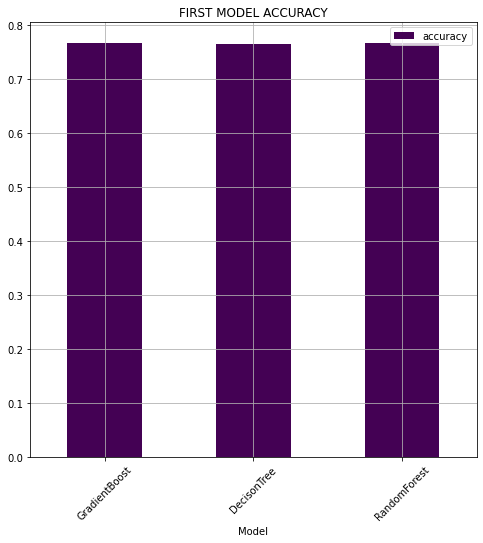

In [102]:
r1 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='FIRST MODEL ACCURACY', colormap=plt.cm.viridis,
               sort_columns=True)
r1.set_xticklabels(result_df.Model, rotation = 45)

- second models

In [103]:
second_model = {'Model': ['GradientBoost', 'DecisonTree', 'RandomForest'],
               'accuracy' : [gb2_score, dt2_score, rf2_score]}

result_df = pd.DataFrame(data = second_model)
result_df

,Model,accuracy
0,GradientBoost,0.7507
1,DecisonTree,0.7694
2,RandomForest,0.7581


[Text(0,0,'Adaboost'),
 Text(0,0,'RandomForest'),
 Text(0,0,'ExtraTrees'),
 Text(0,0,'GradientBoost')]

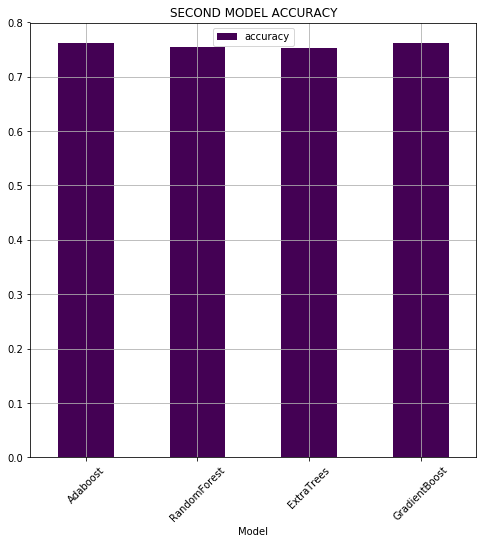

In [60]:
r2 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='SECOND MODEL ACCURACY', colormap=plt.cm.viridis,
               sort_columns=True)
r2.set_xticklabels(result_df.Model, rotation = 45)

- final models

In [100]:
final_model = {'Model': ['GradientBoost', 'DecisonTree', 'RandomForest'],
               'accuracy' : [gb_finalscore, dt_finalscore, rf_finalscore]}

result_df = pd.DataFrame(data = final_model)
result_df

,Model,accuracy
0,GradientBoost,0.7616
1,DecisonTree,0.7779
2,RandomForest,0.7448


[Text(0,0,'Linear Regression'),
 Text(0,0,'Adaboost'),
 Text(0,0,'RandomForest'),
 Text(0,0,'ExtraTrees'),
 Text(0,0,'GradientBoost'),
 Text(0,0,'MLP')]

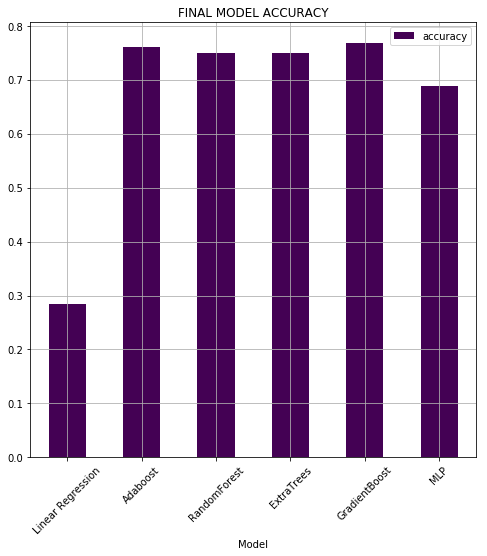

In [62]:
r3 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='FINAL MODEL ACCURACY', colormap=plt.cm.viridis,
               sort_columns=True)
r3.set_xticklabels(result_df.Model, rotation = 45)